# Sheet 5 Exercise 1: Nonlinear Network with Divisive Inhibition (Credits: 4)
Note: All computations are supposed to be carried out by hand! You need to submit your computations to complete the exercise. You can either write your computations into the notebook using LaTeX syntax, or submit them on paper (scan).

*Aleksejs Timcenko*

Consider a network consisting of two neurons, given by
$$\begin{align}\tau\dot{u}_1(t) = -u_1(t) + \frac{s_1}{1+u_2(t)}, \\ 
   \tau \dot{u}_2(t) = -u_2(t) + \frac{s_2}{1 + u_1(t)}. \end{align}$$
The inputs $s_1$, $s_2$ are assumed to be non-negative.

#### 1.1 
Show that when $u_1(0)\geq 0$ and $u_2(0) \geq 0$, then $u_1(t) \geq 0$ and $u_2(t) \geq 0$ for all $t\geq 0$.

*Hint:* Think about what happens on the boundaries of the quadrant, i.e. where $u_1=0$ or $u_2=0$.

From now on, we only consider states where $u_1 \geq 0$ and $u_2 \geq 0$.

*Let's consider the quadrant boundaries and look at the derivatives*

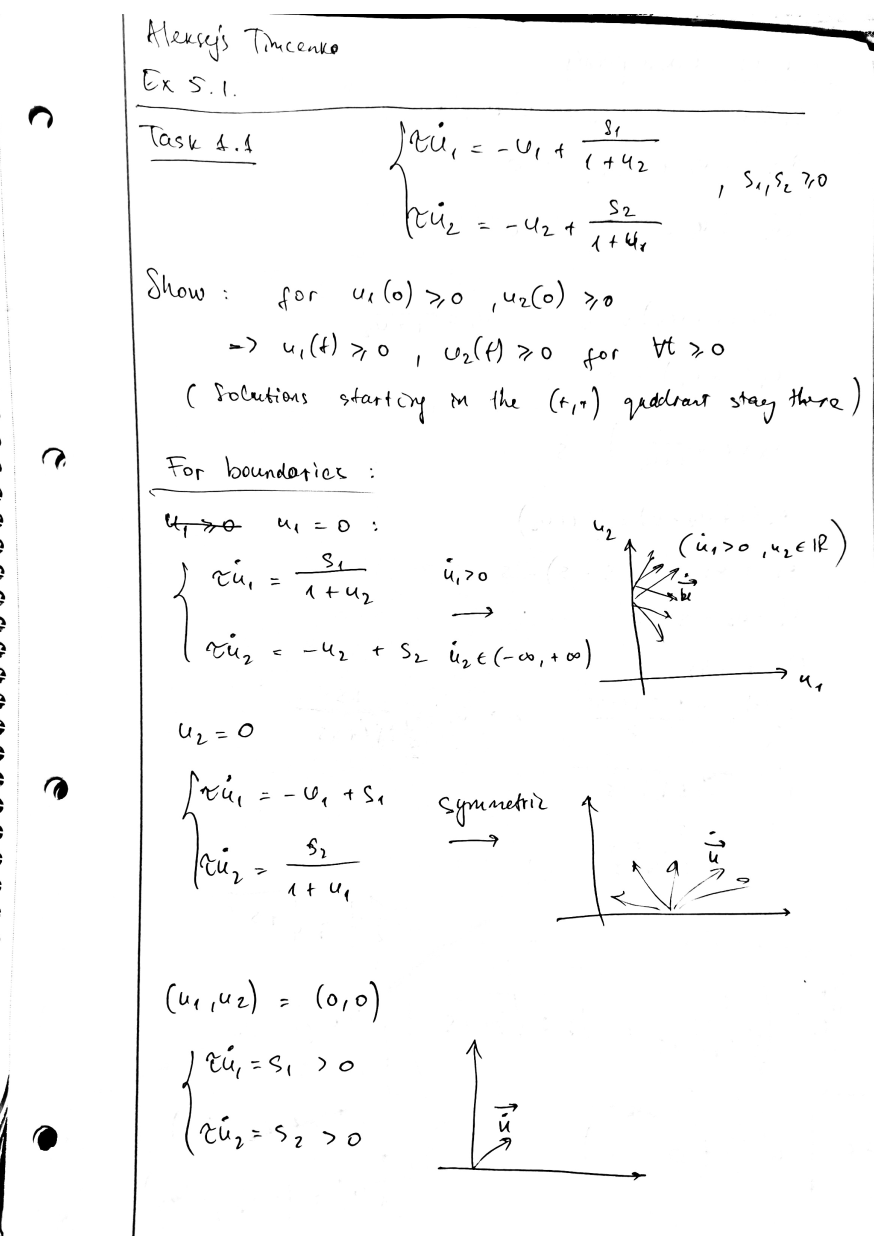

#### 1.2
Compute the relevant fixed points of the system for $s_1=s_2 \geq 0$. Compute them explicitly for $s=0$ and $s=\frac{3}{4}$. 

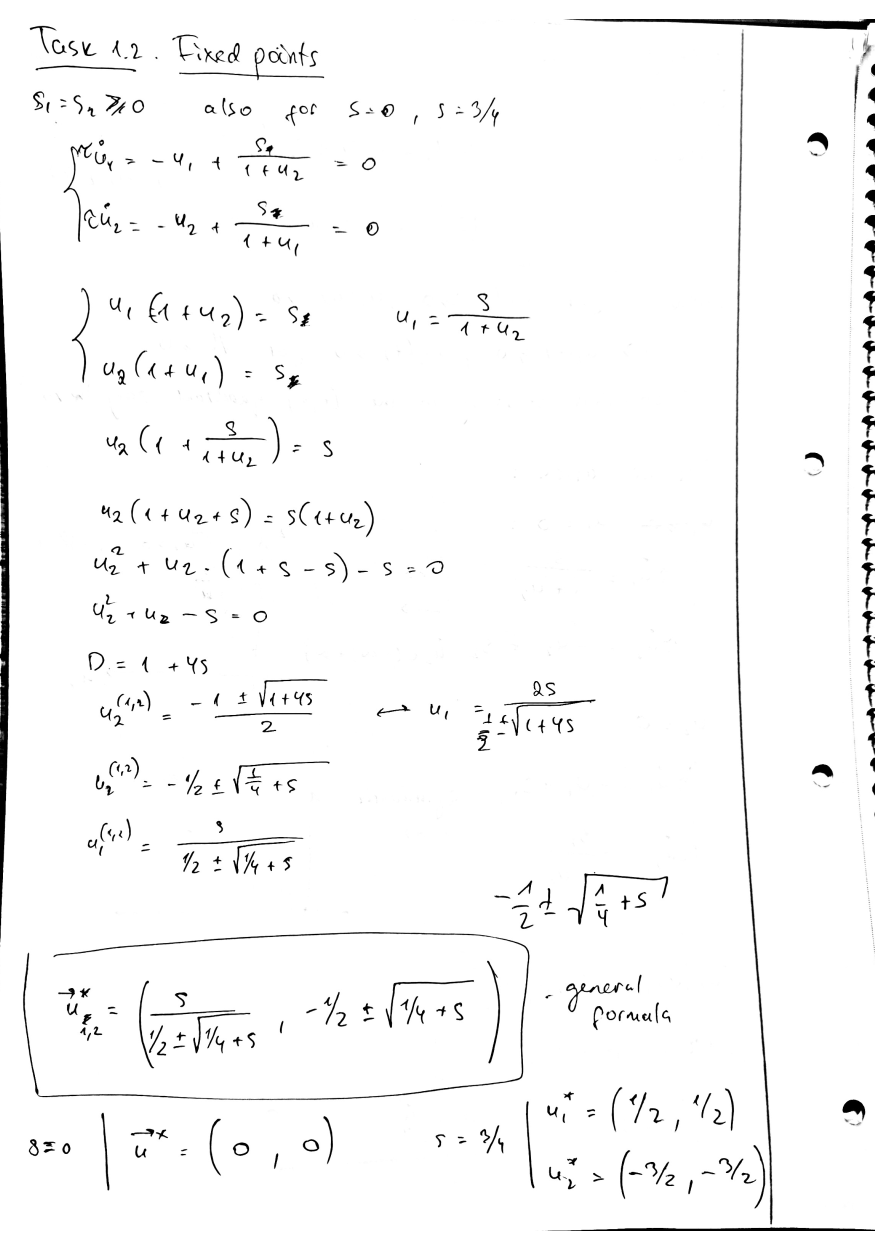

#### 1.3
Compute the linearized system for the obtained relevant fixed points and analyze their stability.

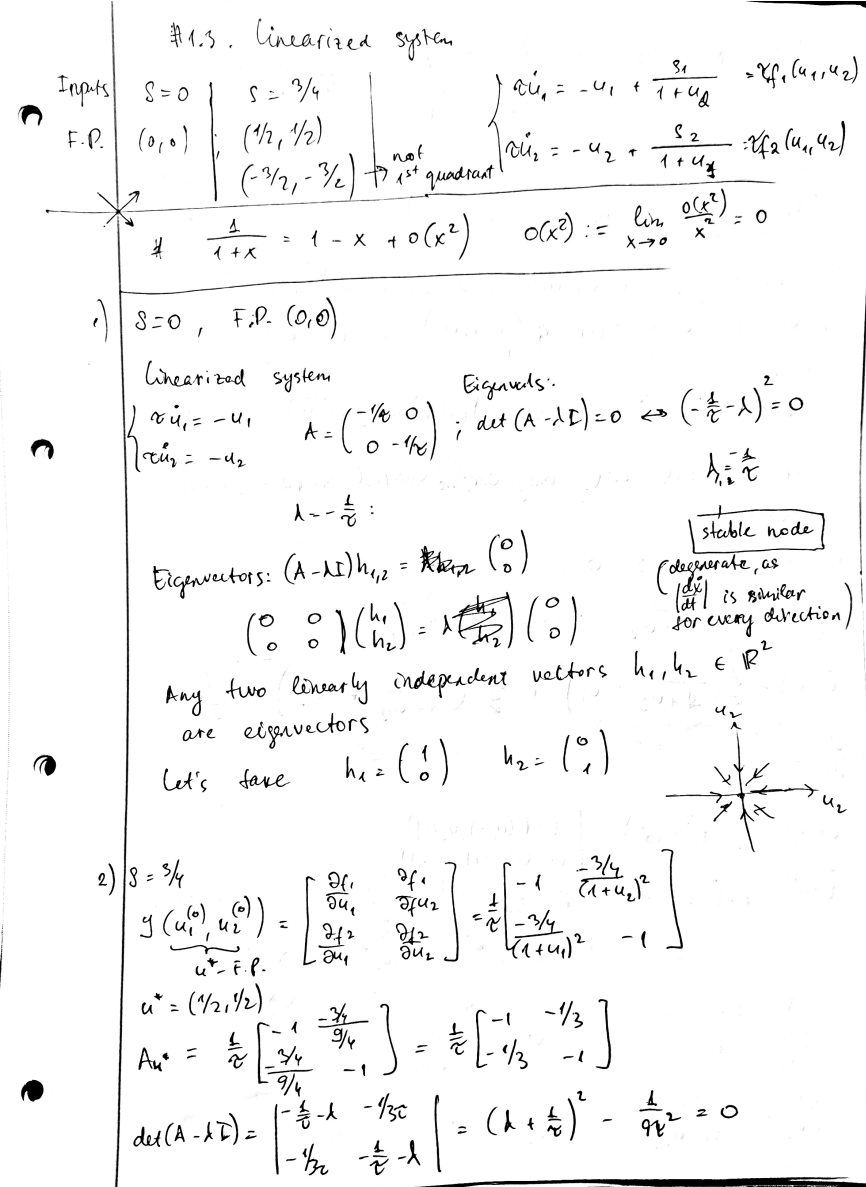

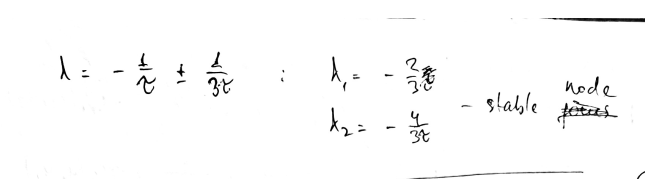

#### 1.4
Plot the system's dynamics for the two input signals using a quiver plot. Do the plots confirm your results from 1.2 and 1.3?

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
### CODE FOR YOUR PLOTS HERE ###

def get_du(u, args):
    tau, s = args
    u1, u2 = u
    du1 = 1 / tau * (-u1 + s / (1 + u2))
    du2 = 1 / tau * (-u2 + s / (1 + u1))
    return np.array([du1, du2])


def get_vector_field(u1_span=(0, 5), u2_span=(0, 5), n_points=50, func_du=get_du, args=(1, 3/4)):
    u1_grid = np.linspace(*u1_span, n_points)
    u2_grid = np.linspace(*u2_span, n_points)
    u1_mesh, u2_mesh = np.meshgrid(u1_grid, u2_grid)
    vector_field = np.zeros((2, n_points, n_points))
    for i in range(n_points):
        for j in range(n_points):  
            u = np.array([u1_mesh[i, j], u2_mesh[i, j]])
            vector_field[:, i, j] = func_du(u, args)
            
    return u1_grid, u2_grid, vector_field   

### CODE FOR YOUR PLOTS HERE ###

C:\Users\aleks\AppData\Local\Temp\ipykernel_24096\1531586297.py:6: RuntimeWarning: divide by zero encountered in log
  plt.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=1.5, linewidth=1)


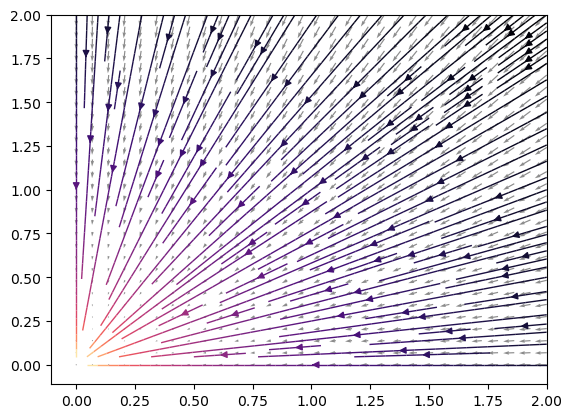

In [9]:
scale = 2
args = (1, 0)

u1, u2, vf = get_vector_field((0, scale), (0, scale), n_points=30, args=args)
plt.quiver(u1, u2, vf[0], vf[1], color='grey', alpha=0.9)
plt.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=1.5, linewidth=1)

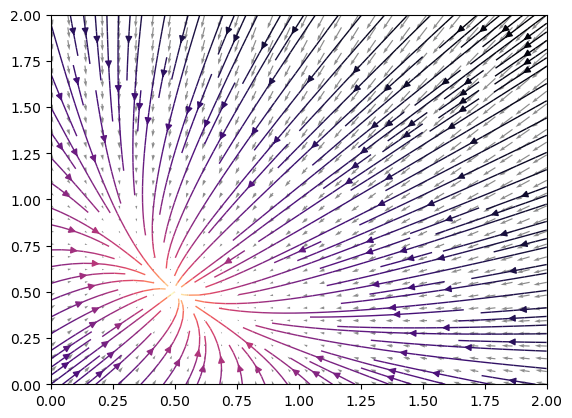

In [8]:
scale = 2
args = (1, 3/4)

u1, u2, vf = get_vector_field((0, scale), (0, scale), n_points=30, args=args)
plt.quiver(u1, u2, vf[0], vf[1], color='grey', alpha=0.9)
plt.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=1.5, linewidth=1)

*The dynamics (at least in a positive quadrant) is exactly like predicted by the analytical solution. For both input values there is a stable fix point (albeit in different locations). For $s = 0$ it is a degenerate node (as the whole plane has the same eigenvalue) and for $s = 3/4$ and $\tau = 1$ $(1/2;1/2)$ is a stable node with two distinct eigenvalues.*

#### 1.5
Derive a Lyapunov function for this system. Where is this function's time derivative negative, and what does that mean for the stability of the system?

*Hint:* In the lecture, we discussed a theorem that can be used to derive a Lyapunov function for this system.

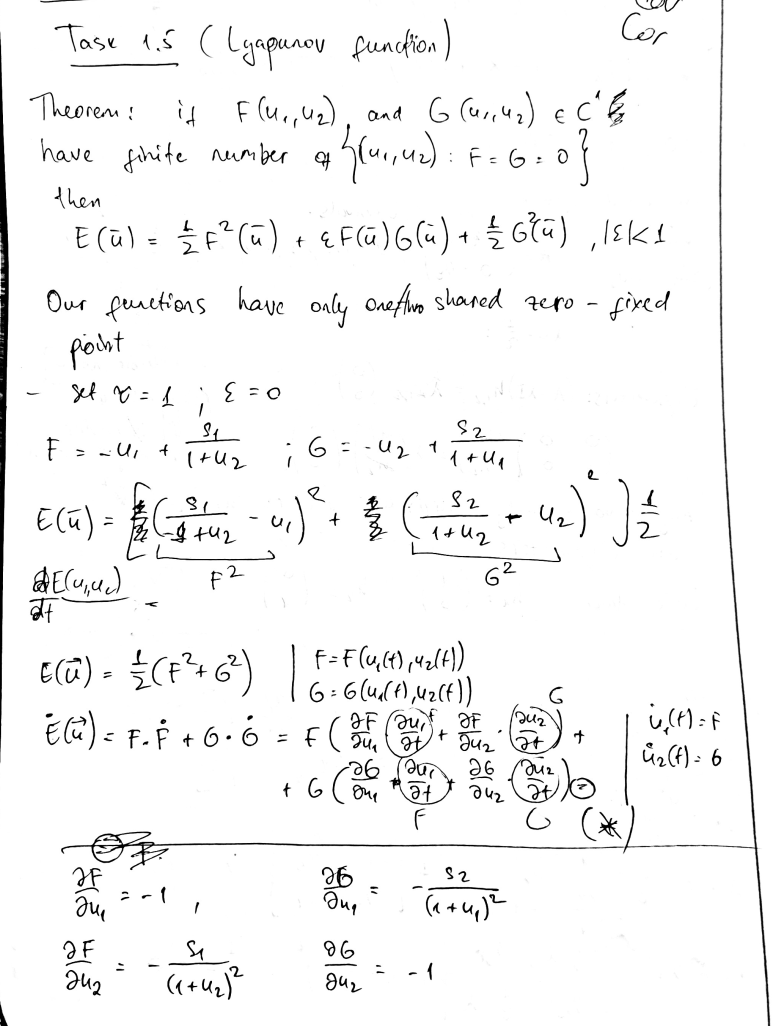

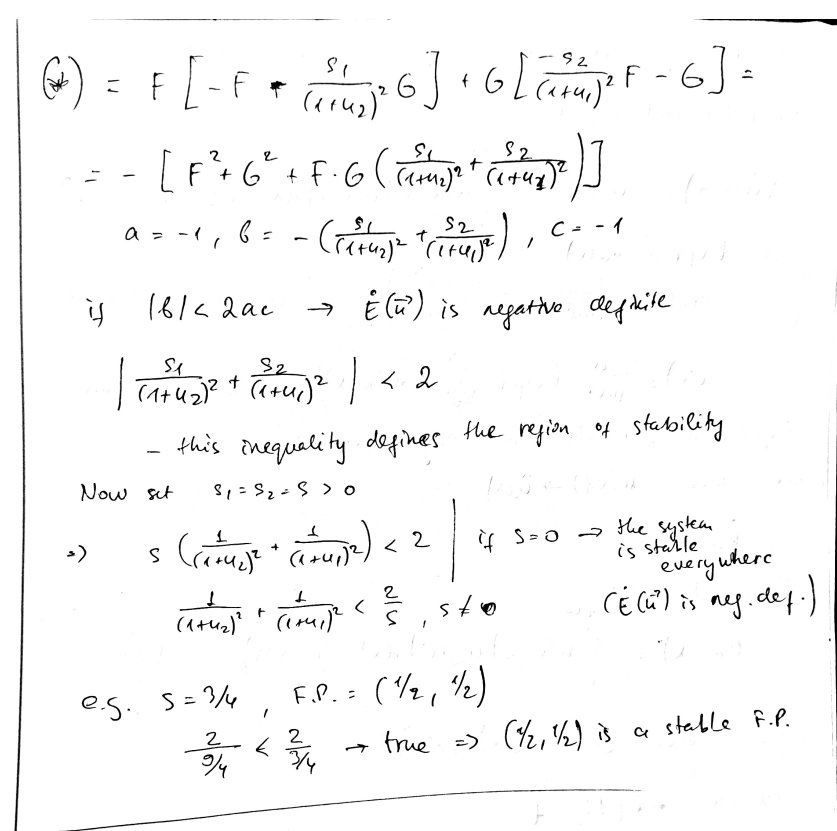

*We found the Lyapunov function which time-derivative is less than zero in a vicinity of a fixed point, confirming its stability*